HERE I will be extacting the frame-ids corresponding to each text-segment.

In [5]:
import json
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [6]:
base_dir = '/common/home/vk405/Projects/Crossmdl/'
annot_dir = base_dir+'Data/YouCookII/annotations/'
annot_file = annot_dir+'youcookii_annotations_trainval.json'
new_annot_file = annot_dir+'segment_youcookii_annotations_trainval.json'

In [7]:

def get_ids(duration,start,end,frame_cnt=500):
    #k = duration/frame_cnt
    sampling_pnts = np.linspace(0,duration,frame_cnt)
    # note that this function is noisy, thus doesn't recover exact match.
    ids = []
    for ind,ele in enumerate(sampling_pnts):
        if start<=round(ele)<=end:
            ids.append(ind)
    assert len(ids)>=1,f"no segments returned, duration:{duration},start:{start},end:{end}"
    return ids

In [8]:


def get_new_annotns(annot_file):
    seglen_list = []
    with open(annot_file) as f:
        annots = json.load(f)
        d = annots['database']
        out_dict = copy.deepcopy(d)
        for vid_name in d:
            duration = d[vid_name]['duration']
            new_lis = []
            seg_list = d[vid_name]['annotations']
            for seg_dict in seg_list:
                new_seg_dict = copy.deepcopy(seg_dict)
                start,end = seg_dict['segment']
                ids = get_ids(duration,start,end,frame_cnt=500)
                seglen_list.append(ids[-1]-ids[0])
                new_seg_dict['segment'] = ids
                new_lis.append(new_seg_dict)
            out_dict[vid_name]['annotations'] = new_lis
    return out_dict,seglen_list
        
    
    
    

In [9]:
new_file,seglist = get_new_annotns(annot_file)

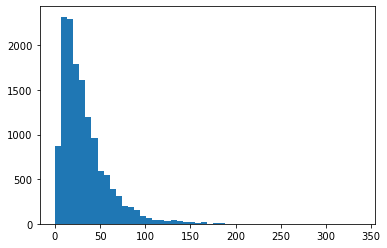

In [76]:


_ = plt.hist(seglist,bins=50)

In [10]:

df = pd.DataFrame({'percentile_ind':np.linspace(0,100,25),
 'percentile':[np.percentile(seglist,p) for p in np.linspace(0,100,25)]})

In [11]:
# distribution of frame lengths
df

,percentile_ind,percentile
0,0.000000,0.0
1,4.166667,5.0
2,8.333333,8.0
3,12.500000,9.0
4,16.666667,11.0
5,20.833333,13.0
6,25.000000,14.0
7,29.166667,16.0
8,33.333333,18.0
9,37.500000,20.0


In [71]:
# store the file
#with open(new_annot_file, 'w') as outfile:
    #json.dump(new_file, outfile)

In [73]:
new_file['GLd3aX16zBg']

{'duration': 241.62,
 'subset': 'training',
 'recipe_type': '113',
 'annotations': [{'segment': [185,
    186,
    187,
    188,
    189,
    190,
    191,
    192,
    193,
    194,
    195,
    196,
    197,
    198,
    199,
    200,
    201,
    202,
    203,
    204,
    205,
    206,
    207,
    208,
    209,
    210,
    211],
   'id': 0,
   'sentence': 'spread margarine on two slices of white bread'},
  {'segment': [235,
    236,
    237,
    238,
    239,
    240,
    241,
    242,
    243,
    244,
    245,
    246,
    247,
    248,
    249,
    250,
    251,
    252,
    253,
    254,
    255,
    256,
    257,
    258,
    259,
    260,
    261,
    262,
    263],
   'id': 1,
   'sentence': 'place a slice of cheese on the bread'},
  {'segment': [272,
    273,
    274,
    275,
    276,
    277,
    278,
    279,
    280,
    281,
    282,
    283,
    284,
    285,
    286],
   'id': 2,
   'sentence': 'place the bread slices on top of each other and place in a hot pan'},


TODO: Handle variable sequence lengths intelligently. Padding, batch efficiency.

Ref:
    http://mccormickml.com/2020/07/29/smart-batching-tutorial/